In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows 
#warnings.filterwarnings('ignore') # ignore warnings



In [3]:
# 🔧 Basic functions
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.info()}.\n")
    return data.sample(5)

def clean_columns(data): # clean columns names
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    return data.sample(0)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces added a table with percentage missing
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
    nulls.sort_values('percentage', ascending = False)
    print(nulls)
    return exploration

In [4]:
df_1=pd.read_csv('D:\Ironhack\datos_proyecto\eurostat\estat_urb_ceduc_en.csv')  
df_1=df_1.pivot(index=['cities','TIME_PERIOD'],columns='indic_ur',values='OBS_VALUE')
df_1=df_1.reset_index()

In [5]:
df_1.head(4)

indic_ur,cities,TIME_PERIOD,TE1001I,TE1001V,TE1026I,TE1026V,TE1027V,TE1028V,TE1039V,TE1040V,TE1041V,TE2025V,TE2028I,TE2028V,TE2031I,TE2031V
0,AT,1998,NaN,NaN,31.0,247498.0,125824.0,121674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT,1999,NaN,NaN,32.0,252893.0,126359.0,126534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT,2000,NaN,NaN,33.0,261229.0,128107.0,133122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT,2001,354.0,146075.0,33.0,264669.0,127447.0,137222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11180 entries, 0 to 11179
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cities       11180 non-null  object 
 1   TIME_PERIOD  11180 non-null  int64  
 2   TE1001I      4976 non-null   float64
 3   TE1001V      6390 non-null   float64
 4   TE1026I      7784 non-null   float64
 5   TE1026V      9166 non-null   float64
 6   TE1027V      6621 non-null   float64
 7   TE1028V      6643 non-null   float64
 8   TE1039V      1132 non-null   float64
 9   TE1040V      1047 non-null   float64
 10  TE1041V      1036 non-null   float64
 11  TE2025V      5471 non-null   float64
 12  TE2028I      4246 non-null   float64
 13  TE2028V      5669 non-null   float64
 14  TE2031I      4255 non-null   float64
 15  TE2031V      5664 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
columns = df_1.columns
subsets = df_1['cities'].unique()

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=columns)

# Loop through each subset (category) in cities
for subset in subsets:
    subset_data = df_1[df_1['cities'] == subset]
    subset_values = {}

    # Loop through each column
    for column in columns:
        column_values = subset_data[column]

        # Find the first non-null value
        first_non_null = column_values.dropna().iloc[0] if not column_values.isnull().all() else None

        # Store the first non-null value for the column
        subset_values[column] = first_non_null

    # Convert the subset_values dictionary to a DataFrame
    subset_df = pd.DataFrame(subset_values, index=[0])

    # Concatenate the subset DataFrame to the result DataFrame
    result_df = pd.concat([result_df, subset_df], ignore_index=True)


In [24]:
result_df.head(10)

,cities,TIME_PERIOD,TE1001I,TE1001V,TE1026I,TE1026V,TE1027V,TE1028V,TE1039V,TE1040V,TE1041V,TE2025V,TE2028I,TE2028V,TE2031I,TE2031V
0,AT,1998,354.0,146075.0,31.0,247498.0,125824.0,121674.0,NaN,NaN,NaN,1526527.0,69.0,3124099.0,19.0,862393.0
1,AT001C,1991,327.0,25155.0,77.0,123703.0,57282.0,66421.0,NaN,NaN,NaN,277380.0,64.0,600119.0,25.0,237436.0
2,AT002C,1991,228.0,2632.0,152.0,35778.0,18108.0,17670.0,NaN,NaN,NaN,34655.0,68.0,96731.0,31.0,44395.0
3,AT003C,1991,310.0,3003.0,68.0,12660.0,6840.0,5820.0,NaN,NaN,NaN,35147.0,66.0,69878.0,22.0,22767.0
4,AT004C,2001,459.0,2939.0,90.0,13103.0,5235.0,7868.0,NaN,NaN,NaN,26484.0,63.0,53468.0,25.0,20943.0
5,AT005C,2001,416.0,2167.0,210.0,24033.0,11706.0,12327.0,NaN,NaN,NaN,19350.0,66.0,43764.0,28.0,18464.0
6,AT006C,2013,553.0,2286.0,141.0,13453.0,5434.0,8019.0,NaN,NaN,NaN,None,None,None,None,None
7,BE,1991,104.0,62754.0,34.0,351788.0,168482.0,183306.0,NaN,NaN,NaN,2373886.0,47.0,2688076.0,35.0,2011305.0
8,BE001C,1996,182.0,10885.0,72.0,68470.0,32269.0,37329.0,NaN,NaN,NaN,262741.0,35.0,199145.0,43.0,246449.0
9,BE002C,1996,111.0,2960.0,57.0,25932.0,12431.0,15466.0,NaN,NaN,NaN,None,None,None,None,None


In [30]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cities       907 non-null    object
 1   TIME_PERIOD  907 non-null    object
 2   TE1001I      620 non-null    object
 3   TE1001V      626 non-null    object
 4   TE1026I      816 non-null    object
 5   TE1026V      820 non-null    object
 6   TE1027V      819 non-null    object
 7   TE1028V      819 non-null    object
 8   TE1039V      190 non-null    object
 9   TE1040V      180 non-null    object
 10  TE1041V      179 non-null    object
 11  TE2025V      828 non-null    object
 12  TE2028I      806 non-null    object
 13  TE2028V      815 non-null    object
 14  TE2031I      821 non-null    object
 15  TE2031V      830 non-null    object
dtypes: object(16)
memory usage: 113.5+ KB


In [33]:
columns_to_convert = result_df.columns[2:]  # Select columns from the third column (index 2) onwards
result_df[columns_to_convert] = result_df[columns_to_convert].astype(float)

In [34]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cities       907 non-null    object 
 1   TIME_PERIOD  907 non-null    object 
 2   TE1001I      620 non-null    float64
 3   TE1001V      626 non-null    float64
 4   TE1026I      816 non-null    float64
 5   TE1026V      820 non-null    float64
 6   TE1027V      819 non-null    float64
 7   TE1028V      819 non-null    float64
 8   TE1039V      190 non-null    float64
 9   TE1040V      180 non-null    float64
 10  TE1041V      179 non-null    float64
 11  TE2025V      828 non-null    float64
 12  TE2028I      806 non-null    float64
 13  TE2028V      815 non-null    float64
 14  TE2031I      821 non-null    float64
 15  TE2031V      830 non-null    float64
dtypes: float64(14), object(2)
memory usage: 113.5+ KB


In [35]:
nulls = pd.DataFrame(result_df.isna().sum()*100/len(result_df), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
TE1041V,80.264609
TE1040V,80.154355
TE1039V,79.051819
TE1001I,31.642778
TE1001V,30.981257
TE2028I,11.135612
TE2028V,10.143330
TE1026I,10.033076
TE1027V,9.702315
TE1028V,9.702315


In [36]:
#Third part of dictionary 
df_headers=pd.read_excel(r'D:\Ironhack\datos_proyecto\eurostat\more columns.xlsx',sheet_name='urb_leduc')  
df_headers=df_headers.drop(columns=['Unnamed: 0'])
rename={'code':'Column Name','description':'label'}
df_headers = df_headers.rename(columns=rename)
dictionary_df=df_headers
#dictionary_df=pd.merge(left=dictionary_df,right=df_headers,how='left',left_on=['Column Name'],right_on=['Column Name'])
#dictionary_df=dictionary_df.reset_index(drop=True)
#dictionary_df['label'] = dictionary_df['label_x'].fillna(dictionary_df['label_y'])
#dictionary_df = dictionary_df.drop(['label_x', 'label_y'], axis=1)

In [37]:
dictionary_df

,Column Name,label
0,TE1001V,Number of children 0-4 in day care or school
1,TE1039V,Share of early leavers from education and trai...
2,TE1040V,Share of early leavers from education and trai...
3,TE1041V,Share of early leavers from education and trai...
4,TE1026V,Students in higher education (ISCED level 5-8 ...
5,TE1027V,Students in higher education (ISCED level 5-8 ...
6,TE1028V,Students in higher education (ISCED level 5-8 ...
7,TE2025V,"Persons (aged 25-64) with ISCED level 0, 1or 2..."
8,TE2028V,Persons (aged 25-64) with ISCED level 3 or 4 a...
9,TE2031V,"Persons aged 25-64 with ISCED level 5, 6, 7 or..."


In [38]:
nan_df=pd.merge(left=nulls,right=dictionary_df,how='left',left_index=True,right_on=['Column Name'])
nan_df=nan_df.reset_index(drop=True)
nan_df.sort_values(by='percentage',ascending=False)

,percentage,Column Name,label
10,80.264609,TE1041V,Share of early leavers from education and trai...
9,80.154355,TE1040V,Share of early leavers from education and trai...
8,79.051819,TE1039V,Share of early leavers from education and trai...
2,31.642778,TE1001I,Number of Children 0-4 in day care (publ.&priv...
3,30.981257,TE1001V,Number of children 0-4 in day care or school
12,11.135612,TE2028I,Proportion of working age population qualified...
13,10.143330,TE2028V,Persons (aged 25-64) with ISCED level 3 or 4 a...
4,10.033076,TE1026I,Share of students in higher education in the t...
6,9.702315,TE1027V,Students in higher education (ISCED level 5-8 ...
7,9.702315,TE1028V,Students in higher education (ISCED level 5-8 ...


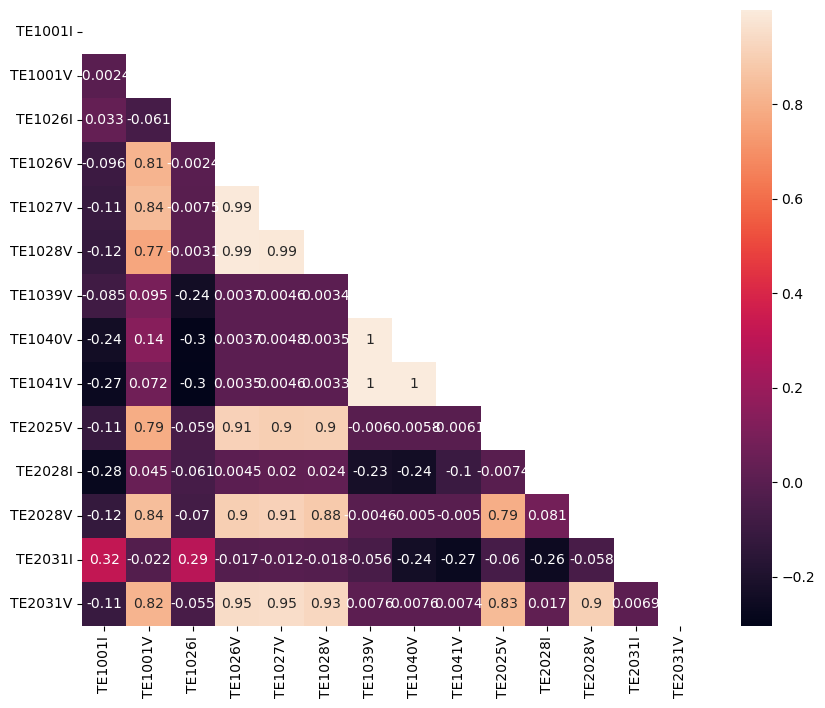

In [39]:
df=result_df.drop(columns=['cities','TIME_PERIOD'])
#Check correlation for each feature agaisnt each other
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [27]:
print(correlations_matrix)

Empty DataFrame
Columns: []
Index: []
